<a href="https://colab.research.google.com/github/Kartikeshthakur/Customer-Segmentation-RFM/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -------------------------------
# Optimized Customer Segmentation
# -------------------------------
''' Customer Segmentation using RFM & K-Means
Overview

This project demonstrates customer segmentation using RFM (Recency, Frequency, Monetary) analysis combined with K-Means clustering on a retail dataset. The goal is to group customers based on purchasing behavior and provide actionable business insights.

Key Features
Data preprocessing and feature engineering of Recency, Frequency, and Monetary values.
Application of K-Means clustering with the Elbow method to determine optimal clusters.
Visualization of customer segments for better interpretation.
Power BI dashboard for interactive business insights.
Well-structured, reproducible Python code and dummy dataset.

Tech Stack
Python: Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn
Power BI: Interactive dashboard creation
Dataset: Dummy retail dataset with 100 records

Project Structure
├── data/
│   └── dummy_retail.csv       # Sample dataset
├── notebooks/
│   └── rfm_kmeans.ipynb       # Python notebook
├── visuals/
│   └── rfm_clusters.png       # Visualization of clusters
├── powerbi/
│   └── customer_segments.pbix # Power BI dashboard
└── README.md                  # Project documentation

Results & Insights
Customers are segmented into distinct groups based on purchase patterns.
High-value customers are identified for retention and loyalty strategies.
Low-frequency customers highlight potential areas for re-engagement.
Provides a scalable framework for real-world customer analytics.

Business Impact
This project demonstrates how businesses can leverage customer segmentation to:
Personalize marketing campaigns.
Improve customer retention.
Optimize sales strategies.
Enhance overall customer lifetime value
'''

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
# Step 1: Load Dummy Dataset
df = pd.read_csv("/content/retail.csv")  # Upload your dummy_retail.csv in Colab

In [4]:
print(df.head())

   CustomerID InvoiceDate  Quantity   UnitPrice  TotalAmount
0        1001  2024-09-12         8  301.335950  2410.687597
1        1001  2025-05-16         3   54.487583   163.462750
2        1001  2025-05-31         5  302.551931  1512.759654
3        1001  2025-03-28         3   15.189325    45.567974
4        1001  2024-12-12         8  417.059107  3336.472858


In [5]:
# Show shape (rows, columns)
print("\nShape of dataset:", df.shape)


Shape of dataset: (694, 5)


In [6]:
# Show basic info (columns, data types, non-null counts)
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   694 non-null    int64  
 1   InvoiceDate  694 non-null    object 
 2   Quantity     694 non-null    int64  
 3   UnitPrice    694 non-null    float64
 4   TotalAmount  694 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 27.2+ KB
None


In [7]:
# Show summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
        CustomerID    Quantity   UnitPrice  TotalAmount
count   694.000000  694.000000  694.000000   694.000000
mean   1052.080692    4.974063  251.385727  1280.679582
std      29.054794    2.621240  140.239257  1035.986403
min    1001.000000    1.000000    5.164591    10.752167
25%    1026.000000    3.000000  129.126140   380.669908
50%    1052.000000    5.000000  258.852565  1011.314963
75%    1078.000000    7.000000  367.364934  1961.291850
max    1100.000000    9.000000  499.709794  4445.584493


In [10]:
# Step 2: Create RFM Features
ref_date = pd.to_datetime(df['InvoiceDate']).max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID', as_index=False).agg(
    Recency=('InvoiceDate', lambda x: (ref_date - pd.to_datetime(x).max()).days),
    Frequency=('InvoiceDate', 'count'),
    Monetary=('TotalAmount', 'sum')
)

In [11]:
# Step 3: Standardize Data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [12]:
# Step 4: Apply K-Means (fixed k=4 for small dataset)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [13]:
# Step 5: Cluster Summary
cluster_summary = rfm.groupby('Cluster').mean().round(2)
print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
          CustomerID  Recency  Frequency  Monetary
Cluster                                          
0           1053.34    39.40       7.60   9678.22
1           1049.79    69.31       3.24   3542.65
2           1040.89   224.78       2.00   2295.27
3           1050.78    26.93      11.70  15802.21


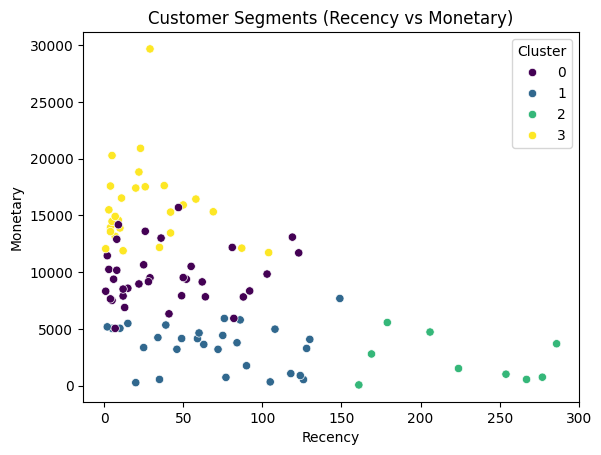

In [14]:
# Step 6: Visualizations
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.title("Customer Segments (Recency vs Monetary)")
plt.show()

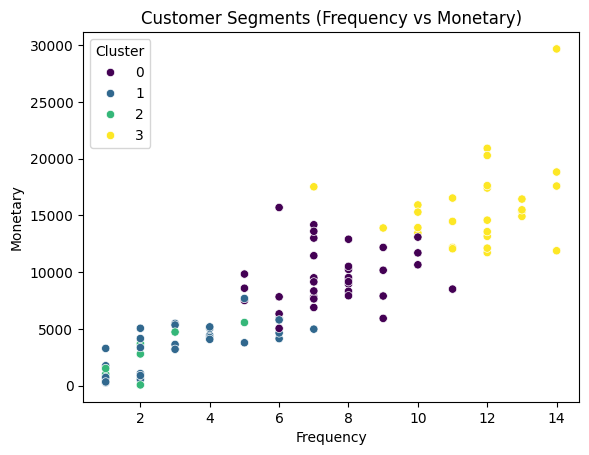

In [15]:
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.title("Customer Segments (Frequency vs Monetary)")
plt.show()

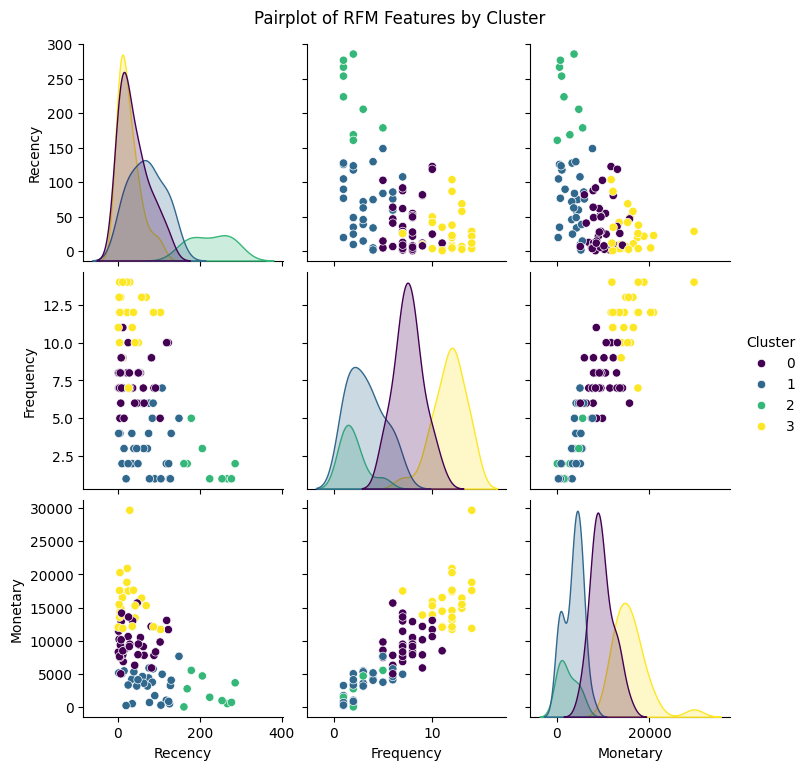

In [16]:
#Pairplot (All RFM Features vs Cluster)
sns.pairplot(rfm[['Recency', 'Frequency', 'Monetary', 'Cluster']], hue='Cluster', palette='viridis')
plt.suptitle("Pairplot of RFM Features by Cluster", y=1.02)
plt.show()

/tmp/ipython-input-2097769280.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Recency', data=rfm, palette='viridis', ax=axes[0])
/tmp/ipython-input-2097769280.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Frequency', data=rfm, palette='viridis', ax=axes[1])
/tmp/ipython-input-2097769280.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Monetary', data=rfm, palette='viridis', ax=axes[2])


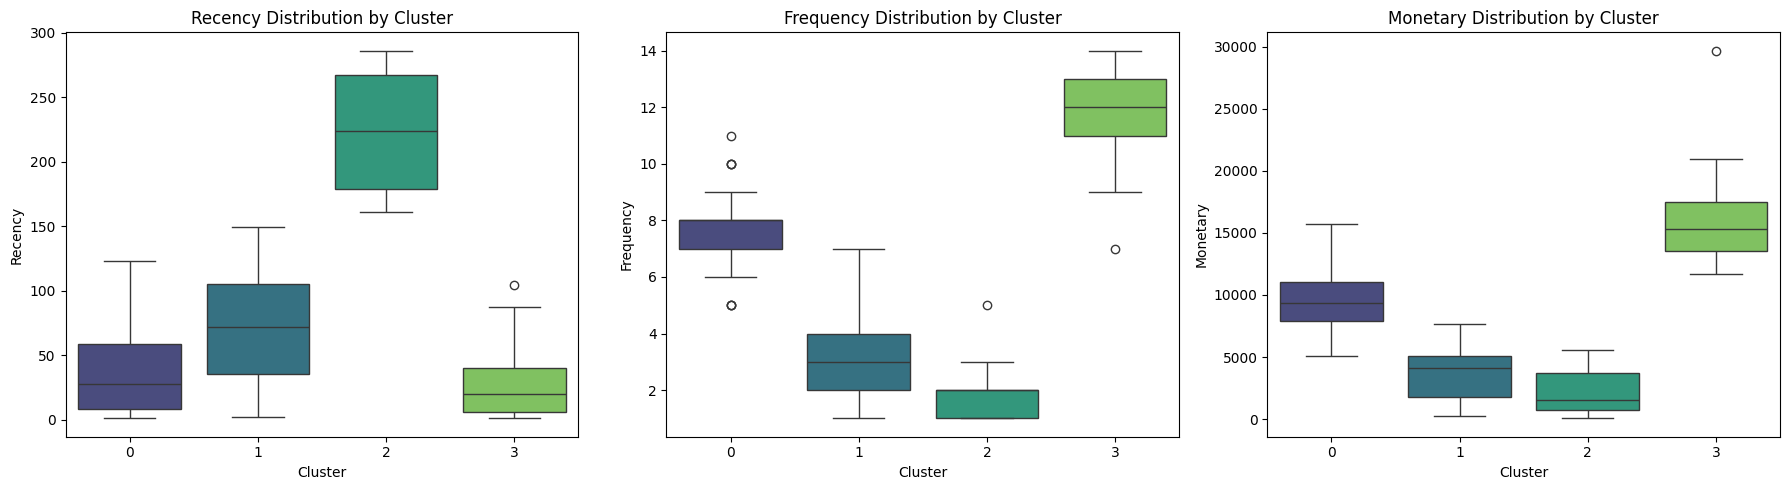

In [18]:
#Boxplots (Distribution per Cluster)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x='Cluster', y='Recency', data=rfm, palette='viridis', ax=axes[0])
axes[0].set_title("Recency Distribution by Cluster")

sns.boxplot(x='Cluster', y='Frequency', data=rfm, palette='viridis', ax=axes[1])
axes[1].set_title("Frequency Distribution by Cluster")

sns.boxplot(x='Cluster', y='Monetary', data=rfm, palette='viridis', ax=axes[2])
axes[2].set_title("Monetary Distribution by Cluster")

plt.tight_layout()
plt.show()

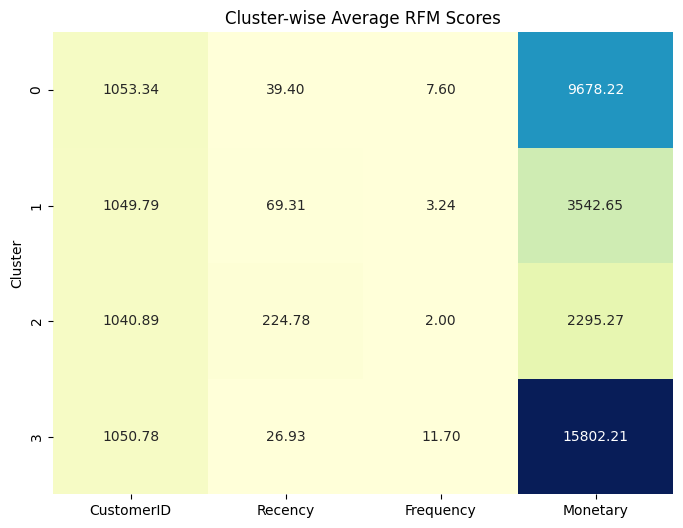

In [19]:
#Cluster Heatmap (Average RFM per Cluster)
plt.figure(figsize=(8,6))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False)
plt.title("Cluster-wise Average RFM Scores")
plt.show()

/tmp/ipython-input-703819360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=rfm, palette='viridis')


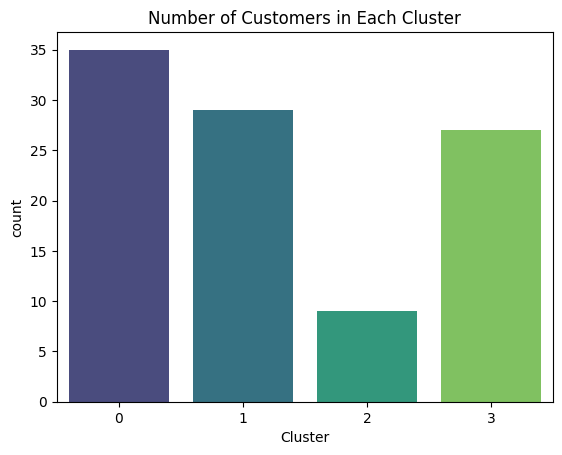

In [20]:
#Countplot (How many customers per cluster)
sns.countplot(x='Cluster', data=rfm, palette='viridis')
plt.title("Number of Customers in Each Cluster")
plt.show()

In [30]:
from google.colab import files

try:
  files.download('Customer_segmentation.ipynb')
except FileNotFoundError:
  print('Error: File not found. Make sure you have the correct file path and name.')

Error: File not found. Make sure you have the correct file path and name.
